In [52]:
# -*- coding: utf-8 -*-
from bs4 import BeautifulSoup
import operator

def rankingXcontinente(archivo, continenteName):
    archivo_continente = open(continenteName.strip() + ".csv", "w")
    archivo_continente.write("pais,no.universidades,continente\n")
    continente = dict()
    orden_paises = []
    with open(archivo) as html_file:
        soup = BeautifulSoup(html_file,'html.parser')
    table_rows = soup.find_all("tr")
    for tr in table_rows:
        td = tr.find_all('td')
        row = [i.text for i in td]
        if row[2] not in continente.keys():
            continente[row[2]] = 1
        else:
            continente[row[2]] += 1
        orden_paises.append(row[2])
    sorted_x = sorted(continente.items(), key=operator.itemgetter(1),reverse=True)
    for pais in sorted_x:
        print (pais[0],pais[1])
        archivo_continente.write(",".join([pais[0],str(pais[1]),continenteName]) )
        archivo_continente.write("\n")
    archivo_continente.close()

    input("Presione enter para continuar")
    return orden_paises

def overallRankingXcontinente(continenteName,orden_paises):
    archivo = continenteName + "OverallScore.html"
    archivo_continente = open(continenteName.strip() + "_Overall.csv", "w")
    archivo_continente.write("pais,overall,continente\n")
    overalls = []
    with open(archivo) as html_file:
        soup = BeautifulSoup(html_file, 'html.parser')
    table_rows = soup.find_all("tr")
    for tr in table_rows:
        td = tr.find_all('td')
        row = [i.text for i in td]
        if (len(row) == 7):
            overall = (float(row[3]) * .4) + (float(row[4]) * .3) + (float(row[5]) * .15) + (float(row[6]) * .15)
        else:
            overall = (float(row[2]) * .4) + (float(row[3] * .3)) + (float(row[4]) * .15) + (float(row[5]) * .15)
        overalls.append(overall)
    i = 0
    for pais in orden_paises:
        archivo_continente.write(",".join([pais, str(overalls[i]), continenteName]))
        archivo_continente.write("\n")
        i+=1
    archivo_continente.close()

def troubleShooting(numero):
    if numero.isdigit():
        numero = int(numero)
        if (numero>0 and numero<8):
            return True
        else:
            print ("Numero fuera de rango. Escoja una opcion valida")
    else:
        print("Ingrese un numero")
    return False

def imprimirMenu():
    print("---Ranking Paises por Continente---\n"
          "1. Africa\n"
          "2. Asia\n"
          "3. Europa\n"
          "4. Latinoamerica\n"
          "5. Norteamerica\n"
          "6. Oceania\n"
          "7. Salir")
    n = input("Escoja una opcion: ")
    while(troubleShooting(n)!=True):
        n = input("Escoja una opcion: ")
    return n

continentes = ['Africa', 'Asia', 'Europa', 'Latinoamerica', 'Norteamerica', 'Oceania']

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
paises = pd.read_csv("salida.csv")
paises.head()

,pais,overall,continente
0,Egypt,57.675000000000004,Africa
1,South Africa,58.355,Africa
2,South Africa,53.599999999999994,Africa
3,South Africa,53.74499999999999,Africa
4,pais,overall,continente


In [55]:
paises = paises.drop(paises[paises.pais =='pais'].index)
paises

,pais,overall,continente
0,Egypt,57.675000000000004,Africa
1,South Africa,58.355,Africa
2,South Africa,53.599999999999994,Africa
3,South Africa,53.74499999999999,Africa
5,Singapore,84.09,Asia
6,Hong Kong,82.79,Asia
7,Singapore,82.1,Asia
8,China,82.005,Asia
9,China,81.53500000000001,Asia
10,Japan,81.295,Asia


In [56]:
paises = paises.drop(paises.index[len(paises)-1])
#Solo aplicar una vez, eliminarirá la ultima fila

In [60]:
def strTofloat(string):
    return float(string)

In [61]:
paises["overall"] = paises["overall"].apply(strTofloat)

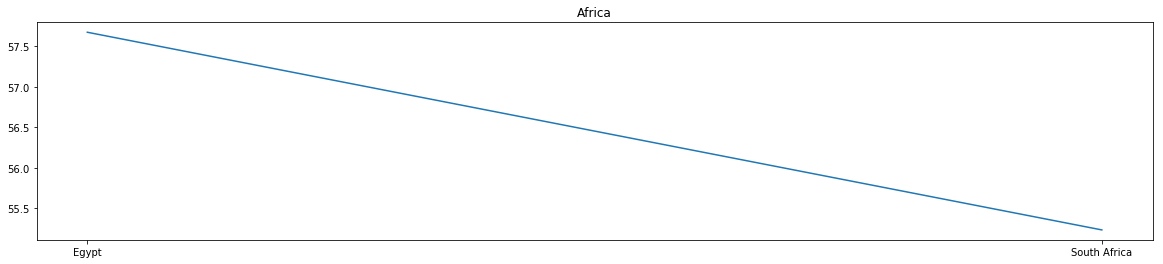

pais
Egypt           57.675000
South Africa    55.233333
Name: overall, dtype: float64


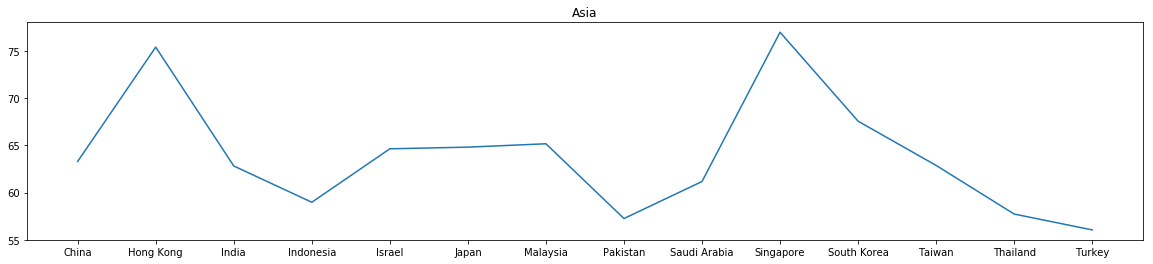

pais
China        63.306458
Hong Kong    75.410833
India        62.822778
Name: overall, dtype: float64


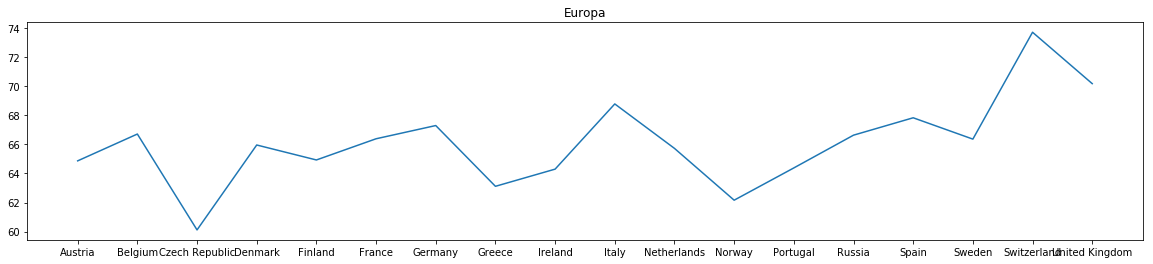

pais
Austria           64.866667
Belgium           66.711667
Czech Republic    60.115000
Name: overall, dtype: float64


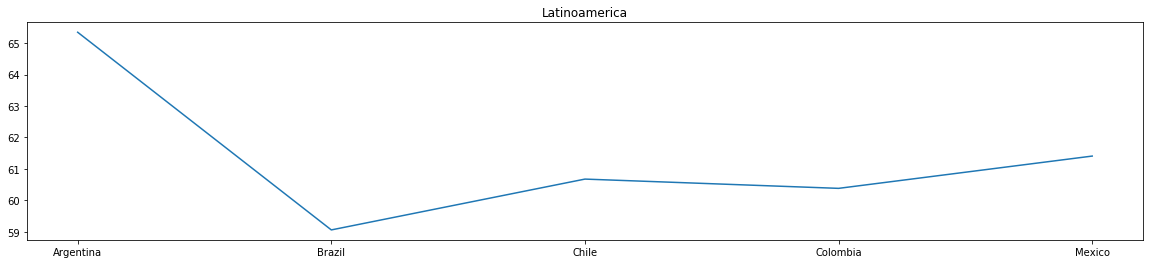

pais
Argentina    65.350
Brazil       59.057
Chile        60.675
Name: overall, dtype: float64


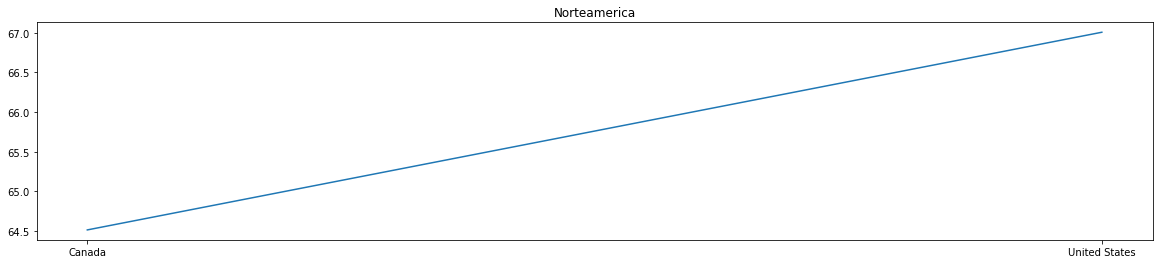

pais
Canada           64.513947
United States    67.005802
Name: overall, dtype: float64


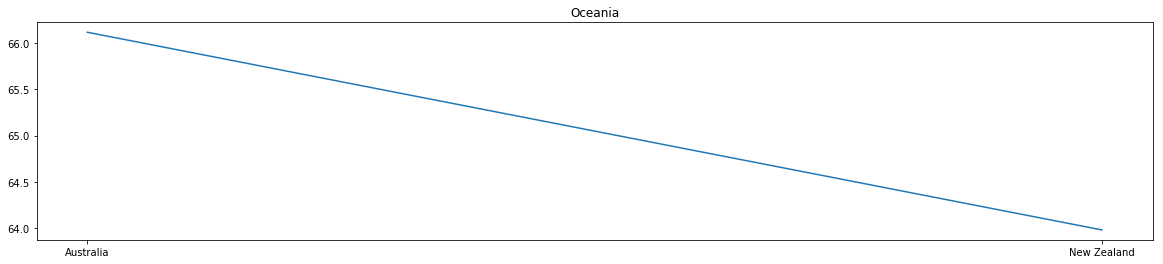

pais
Australia      66.119783
New Zealand    63.979286
Name: overall, dtype: float64


In [80]:
for continente in paises["continente"].unique():
    dataframe = paises[paises.continente == continente]
    df = dataframe.groupby("pais").overall.mean()
    plt.plot(df.index.values,df)
    plt.title(continente)
    plt.show()
    print(df.head(3))

In [68]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
plt.rcParams["figure.figsize"] = fig_size